In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

This is a test circuit to try and calibrate the arudino analog input with a smoother emitter follower voltage buffer.  The circuit has two 10K resistors and a 4.7 microFarad capacitors.

In [2]:
dp1 = pd.read_csv('datasets/calibrate_IN4001.csv', names=['p3', 'a0', 'a1'])


In [3]:
dp1.head()

p3  a0  a1
0   0   0   0
1   1   0   0
2   2   7   8
3   3   7   7
4   4   0   0

In [4]:
dp1['Vin'] = dp1.p3 * 5 / 255
dp1['Va0'] = dp1.a0 * 5 / 1023
dp1['Va1'] = dp1.a1 * 5 / 1023

In [5]:
dp2 = dp1.loc[:,'Vin':'Va1']
dp2.tail()

Vin       Va0       Va1
251  4.921569  4.232649  0.537634
252  4.941176  4.247312  0.537634
253  4.960784  4.271750  0.537634
254  4.980392  4.286413  0.537634
255  5.000000  4.305963  0.537634

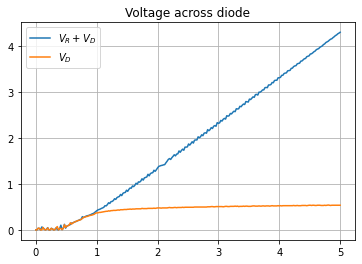

In [6]:
fig, ax = plt.subplots()
ax.plot(dp2.Vin, dp2.Va0, label='$V_R + V_D$')
ax.plot(dp2.Vin, dp2.Va1, label='$V_D$')

ax.grid()
plt.legend()
plt.title("Voltage across diode")
plt.show()

In [8]:
dp2['Id'] = (dp2.Va0 - dp2.Va1)/10000
dp2.tail()

Vin       Va0       Va1        Id
251  4.921569  4.232649  0.537634  0.000370
252  4.941176  4.247312  0.537634  0.000371
253  4.960784  4.271750  0.537634  0.000373
254  4.980392  4.286413  0.537634  0.000375
255  5.000000  4.305963  0.537634  0.000377

In [9]:
dp2.Id

0      0.000000e+00
1      0.000000e+00
2     -4.887586e-07
3      0.000000e+00
4      0.000000e+00
           ...     
251    3.695015e-04
252    3.709677e-04
253    3.734115e-04
254    3.748778e-04
255    3.768328e-04
Name: Id, Length: 256, dtype: float64

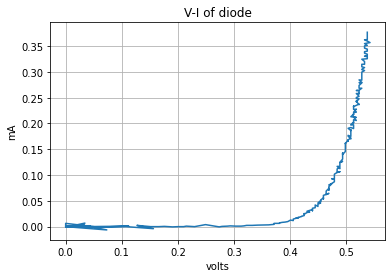

In [11]:
fig, ax = plt.subplots()
ax.plot(dp2.Va1, dp2.Id*1000)
ax.grid()
plt.title("V-I of diode")
plt.xlabel ('volts')
plt.ylabel('mA')
plt.show()

In [12]:
def f(x, a,b):
    y = a*(np.exp(b*x)-1)
    return y

In [13]:
f(np.array([0.2, 0.4]), 1e-6, 2.4)

array([6.16074402e-07, 1.61169647e-06])

In [14]:
popt, pcov = curve_fit(f, dp2.Va1, dp2.Id)

In [15]:
popt

array([2.10076765e-09, 2.24282822e+01])

In [16]:
1/popt[1]

0.04458656224148477

In [17]:
pcov

array([[ 6.90340285e-20, -6.26250318e-11],
       [-6.26250318e-11,  5.68605673e-02]])

In [18]:
f(0.5, *popt)

0.00015581589671406038

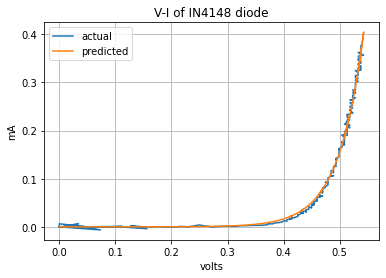

In [19]:
fig, ax = plt.subplots()
ax.plot(dp2.Va1, dp2.Id*1000, label='actual')
ax.plot(dp2.Va1, f(dp2.Va1, *popt)*1000, label='predicted')
ax.grid()
plt.title("V-I of IN4148 diode")
plt.xlabel ('volts')
plt.ylabel('mA')
ax.legend()
plt.show()